In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image

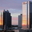

In [2]:
img=Image.open("./seg_pred/seg_pred/5.jpg")
img=img.resize((32,32))
img

In [3]:
#img.resize(32,32)
img.size

(32, 32)

In [4]:
data=tf.keras.utils.image_dataset_from_directory(
    "./seg_train/seg_train/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=14034
)

Found 14034 files belonging to 6 classes.


In [5]:
model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(6),
    layers.Softmax()
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0

In [7]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

In [8]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,6)
    print(features.shape,labels.shape)
    record=model.fit(features,labels,batch_size=50,epochs=10)


(14034, 32, 32, 3) (14034, 6)
Epoch 1/10
281/281 [==============================] - 53s 158ms/step - loss: 1.1098 - accuracy: 0.5774
Epoch 2/10
281/281 [==============================] - 50s 178ms/step - loss: 0.8584 - accuracy: 0.6756
Epoch 3/10
281/281 [==============================] - 40s 143ms/step - loss: 0.7782 - accuracy: 0.7099
Epoch 4/10
281/281 [==============================] - 40s 142ms/step - loss: 0.7207 - accuracy: 0.7324
Epoch 5/10
281/281 [==============================] - 40s 144ms/step - loss: 0.6805 - accuracy: 0.7487
Epoch 6/10
281/281 [==============================] - 43s 151ms/step - loss: 0.6308 - accuracy: 0.7730
Epoch 7/10
281/281 [==============================] - 43s 154ms/step - loss: 0.5921 - accuracy: 0.7850
Epoch 8/10
281/281 [==============================] - 42s 149ms/step - loss: 0.5603 - accuracy: 0.7986
Epoch 9/10
281/281 [==============================] - 46s 165ms/step - loss: 0.5337 - accuracy: 0.8072
Epoch 10/10
281/281 [======================

In [9]:
model=model.save("intel.h5",save_format="h5")

In [10]:
model=tf.keras.models.load_model("intel.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0